In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import  linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,recall_score , precision_score ,accuracy_score,classification_report
%matplotlib inline

In [332]:
Diabetes_Data = pd.read_csv("diabetes_prediction_dataset.csv")
Diabetes_Data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [333]:
Diabetes_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [334]:
Diabetes_Data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [335]:
Diabetes_Data.duplicated().value_counts()

False    96146
True      3854
Name: count, dtype: int64

In [336]:
Diabetes_Data.drop_duplicates(inplace=True )

In [337]:
Diabetes_Data.duplicated().value_counts()

False    96146
Name: count, dtype: int64

In [338]:
lbl = LabelEncoder()
Diabetes_Data["gender"] = lbl.fit_transform(Diabetes_Data['gender'])
Diabetes_Data["smoking_history"] = lbl.fit_transform(Diabetes_Data['smoking_history'])

In [339]:
y = pd.DataFrame(Diabetes_Data["diabetes"])
X=Diabetes_Data.drop("diabetes",axis=1)

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [341]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
7676,0,48.0,0,0,0,22.05,4.8,126
78860,1,14.0,0,0,0,21.01,6.1,158
20335,0,28.0,0,0,0,37.21,6.6,130
94033,0,53.0,0,0,0,24.29,6.2,80
41455,1,44.0,0,0,4,27.88,6.5,160


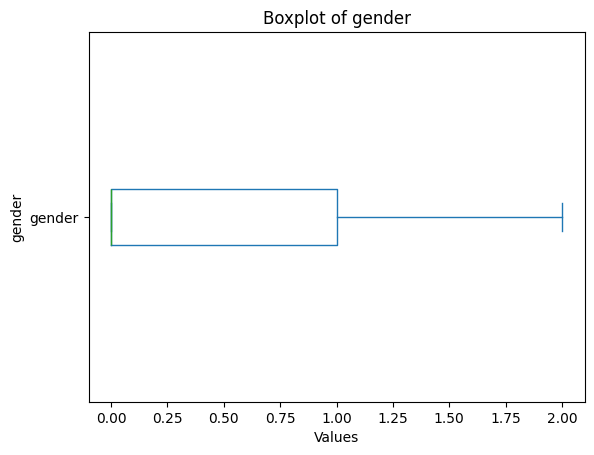

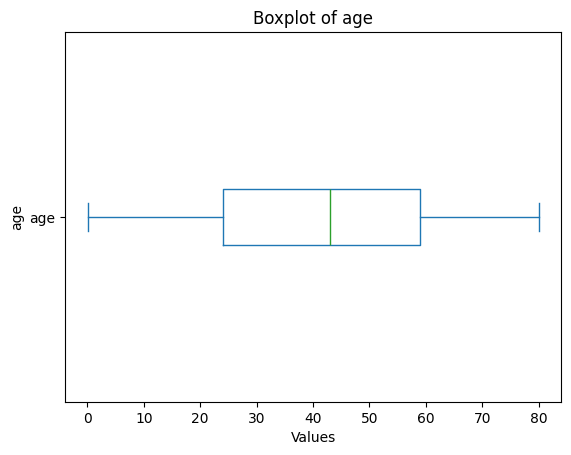

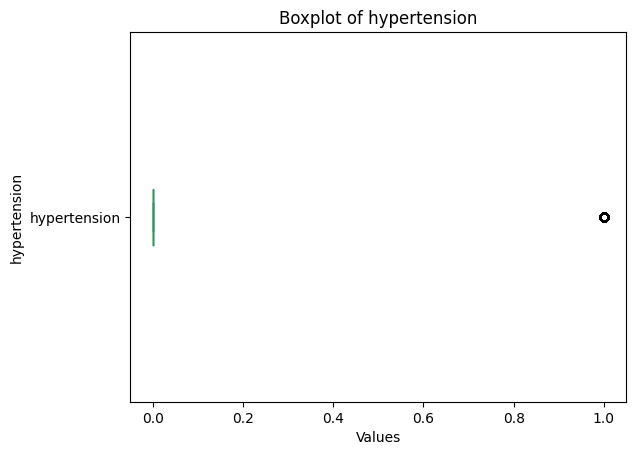

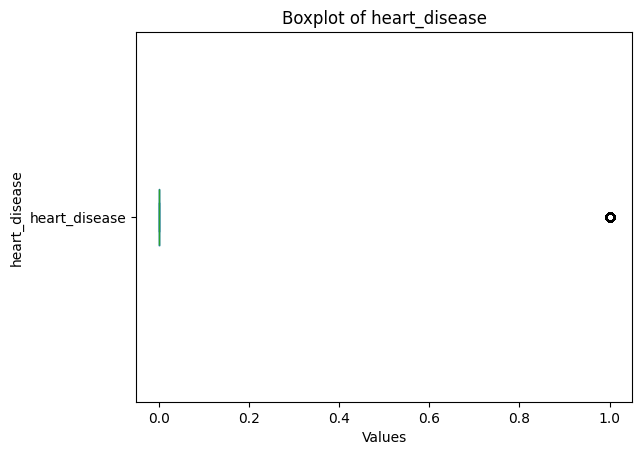

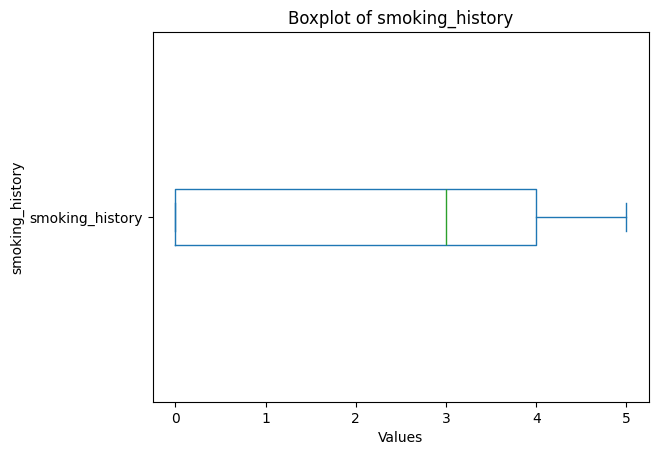

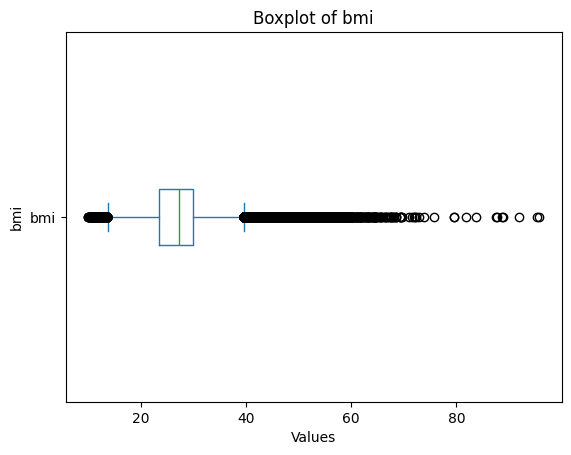

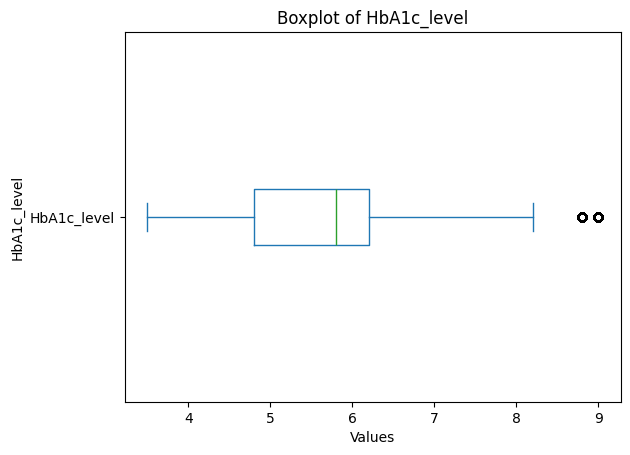

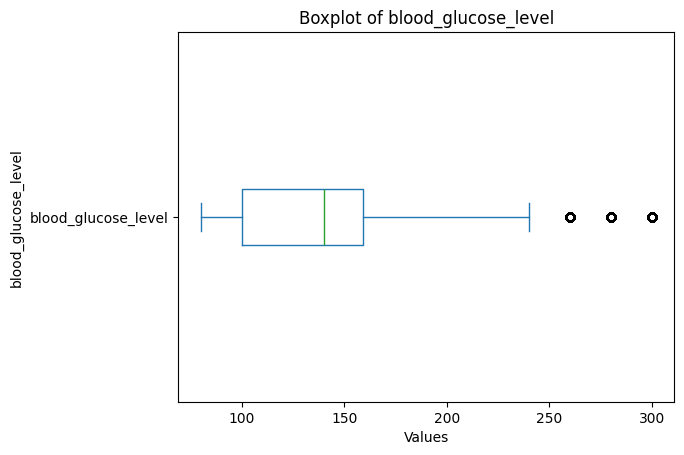

In [342]:
for i in X.columns:
    X[i].plot(kind='box' , vert  =False)
    plt.title(f'Boxplot of {i}')
    plt.xlabel('Values')
    plt.ylabel(i)
    plt.show()

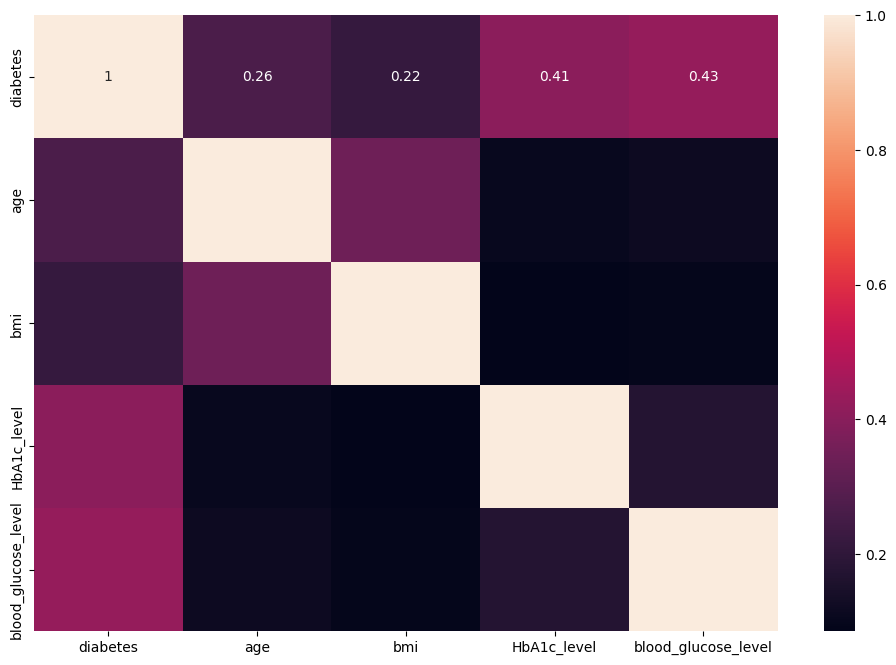

In [343]:
all_data = pd.concat([y_train,X_train],axis=1)
corr=all_data.corr()
top_feature = corr.index[abs(corr['diabetes'])>0.2]
plt.subplots(figsize=(12, 8))
top_corr = all_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [344]:
top_corr = top_corr.drop("diabetes",axis=1)
X_train = X_train[top_corr.columns]
X_test = X_test[top_corr.columns]

In [345]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

c:\Users\Hafez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [346]:
rf = RandomForestClassifier(n_estimators=50, random_state=42 , max_depth=3)

rf.fit(X_train, y_train)



RF_y_pred_Train = rf.predict(X_train)
RF_accuracyTrain = accuracy_score(y_train, RF_y_pred_Train)
print("RF_accuracy accuracy train : " , RF_accuracyTrain)


RF_y_pred = rf.predict(X_test)
RF_accuracyTest = accuracy_score(y_test, RF_y_pred)
print("RF_accuracy accuracy test : " , RF_accuracyTest)

c:\Users\Hafez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF_accuracy accuracy train :  0.9706693015757449
RF_accuracy accuracy test :  0.9711388455538221


In [347]:
print( confusion_matrix(y_test, RF_y_pred))
 #predict >>> #  false   # true
# false #    true negative   false positive 
# true  #   false negative   true positive      

[[17550     0]
 [  555  1125]]


In [348]:
print(classification_report(y_pred=RF_y_pred , y_true=y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17550
           1       1.00      0.67      0.80      1680

    accuracy                           0.97     19230
   macro avg       0.98      0.83      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [361]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNN_y_pred_Train = knn.predict(X_train)

KNN_accuracyTrain = accuracy_score(y_train, KNN_y_pred_Train)
print("KNN Accuracy train: ",KNN_accuracyTrain)

KNN_y_pred = knn.predict(X_test)
KNN_accuracyTest = accuracy_score(y_test, KNN_y_pred)
print("KNN Accuracy test: ",KNN_accuracyTest)

c:\Users\Hafez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy train:  0.9690961568464299
KNN Accuracy test:  0.9534581383255331


In [364]:
print(classification_report(y_pred=KNN_y_pred , y_true=y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17550
           1       0.83      0.59      0.69      1680

    accuracy                           0.95     19230
   macro avg       0.89      0.79      0.83     19230
weighted avg       0.95      0.95      0.95     19230



In [362]:
base_estimator = DecisionTreeClassifier(max_depth=1)

adBoost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42) 
adBoost.fit(X_train, y_train)
adBoost_train = adBoost.predict(X_train)
adBoost_accuracyTrain = accuracy_score(y_train, adBoost_train)

print("Train accuracy of adBoost is : " , adBoost_accuracyTrain)


adBoost_test = adBoost.predict(X_test)
adBoost_accuracyTest = accuracy_score(y_test, adBoost_test)
print("test accuracy of adBoost is : " , adBoost_accuracyTest)


c:\Users\Hafez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy of adBoost is :  0.9706042955951948
test accuracy of adBoost is :  0.9708788351534061


In [365]:
print(classification_report(y_pred=adBoost_test , y_true=y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17550
           1       0.99      0.68      0.80      1680

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [353]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [363]:
linear_predict  = linear_model.predict(X_test)
predict = np.round(linear_predict)
print("Linear test accuracy : ",metrics.accuracy_score(predict,y_test))

linear_predict_train  = linear_model.predict(X_train)
linear_predict_train = np.round(linear_predict_train)

print("Linear train accuracy : ",metrics.accuracy_score(linear_predict_train,y_train))


Linear test accuracy :  0.9373374934997399
Linear train accuracy :  0.9366061677674345


In [373]:
dt = DecisionTreeClassifier(random_state=42 , max_depth=3)

dt.fit(X_train, y_train)



dt_y_pred_Train = dt.predict(X_train)
dt_accuracyTrain = accuracy_score(y_train, dt_y_pred_Train)
print("Decision Tree Train Accuracy: " , dt_accuracyTrain)

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Test Accuracy: " , accuracy)

Decision Tree Train Accuracy:  0.9706693015757449
Decision Tree Test Accuracy:  0.9711388455538221
